In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score


### Data Description 

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
0,255863,1,63,45,0,0,0,2,1,1,2,0
1,583906,4,350,72,0,0,0,2,1,4,6,0
2,280626,12,1019,123,5,2,6,6,1,9,14,0
3,357109,1,503,124,0,0,30,16,0,0,0,0
4,264311,15,1869,139,0,0,34,13,1,12,25,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658052 entries, 0 to 658051
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Unnamed: 0                      658052 non-null  int64
 1   n_visits                        658052 non-null  int64
 2   n_actions                       658052 non-null  int64
 3   unique_actions                  658052 non-null  int64
 4   products_tried                  658052 non-null  int64
 5   products_added                  658052 non-null  int64
 6   unique_products_category_tried  658052 non-null  int64
 7   unique_products_category_added  658052 non-null  int64
 8   saved_to_cart                   658052 non-null  int64
 9   comments_writen                 658052 non-null  int64
 10  counts_of_buys                  658052 non-null  int64
 11  came_back                       658052 non-null  int64
dtypes: int64(12)
memory usage: 60.2 MB


In [5]:
data.describe()

,Unnamed: 0,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
count,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000
mean,469962.923185,8.477398,537.548177,65.913323,5.937011,1.210488,10.309620,4.595120,0.529280,3.532087,5.349092,0.320338
std,271396.332262,30.431194,964.670595,34.721370,16.296478,2.660344,21.909215,5.656423,0.499142,9.826804,13.434137,0.466607
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235061.750000,1.000000,90.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,469900.500000,3.000000,236.000000,62.000000,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000
75%,705102.250000,8.000000,594.000000,87.000000,4.000000,1.000000,10.000000,7.000000,1.000000,3.000000,6.000000,1.000000
max,940074.000000,5996.000000,75408.000000,347.000000,596.000000,73.000000,597.000000,118.000000,1.000000,1212.000000,1591.000000,1.000000


In [6]:
data = data.drop(['Unnamed: 0'],axis = 1)

In [8]:
data.head()

,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
0,1,63,45,0,0,0,2,1,1,2,0
1,4,350,72,0,0,0,2,1,4,6,0
2,12,1019,123,5,2,6,6,1,9,14,0
3,1,503,124,0,0,30,16,0,0,0,0
4,15,1869,139,0,0,34,13,1,12,25,1


### KNN on raw data 

Before doing any manipulation on our data, we need to try model our raw data, than we can improve our models by doing data manipulations. So first of all we split our raw data into test and train data. 

In [9]:
target = data['came_back'].astype(int)
X = data.drop(columns='came_back')
X = pd.get_dummies(X, columns=['saved_to_cart'])

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)

print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 493539
 Test set: 164513


After splitting we need to standardize our data, because in the future we will use KNN and we know that KNN will give higher weights to big values, so we need to standardize them. So all our values will be in the same range. 

In [10]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = train_x.copy()
X_test_stand = test_x.copy()

# numerical features
num_cols = ['n_visits','n_actions','unique_actions','products_tried','products_added','unique_products_category_tried',
           'unique_products_category_added','comments_writen','counts_of_buys']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
# After standardization we try some model with 9 neighbors to see the accuracy. 

from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=9 ,n_jobs=-1)

KNN_model.fit(X_train_stand,train_y)

In [ ]:
pred=KNN_model.predict(X_test_stand)


acc_test = accuracy_score(test_y,pred)
acc_test

In [69]:
# We plot the f1 scores line chart to understand best K for our KNN model. 


from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,30):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train_stand,train_y)
    pred=clf.predict(X_test_stand)
    f=f1_score(test_y,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

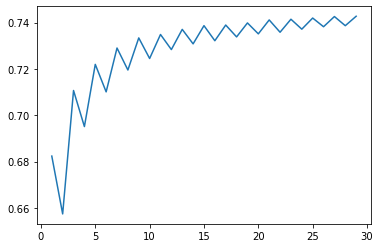

In [70]:
plt.plot(k_list,f1_list)

In [11]:
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

KNN_model.fit(X_train_stand,train_y)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

In [15]:
#So we will get 0.78 accuracy for raw test data with this model. 

pred=KNN_model.predict(X_test_stand)


acc_test = accuracy_score(test_y,pred)
acc_test

0.7817862418167562

In [19]:
prec = precision_score(test_y,pred,average = 'macro')
prec

0.7518524226161112

In [18]:
f1_score(test_y,pred,average = 'macro')

0.7386406453701402

In [21]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84    111886
           1       0.69      0.59      0.63     52627

    accuracy                           0.78    164513
   macro avg       0.75      0.73      0.74    164513
weighted avg       0.78      0.78      0.78    164513



### Decision Tree for raw data 

In [22]:
# Now we try Decision Tree for raw data and without any specified hyperparametr. 

model = DecisionTreeClassifier()
model.fit(X_train_stand,train_y)
pred_dc = model.predict(X_test_stand)
acc_dc = accuracy_score(test_y,pred_dc)

In [24]:
acc_dc

0.7310729243281686

So we can also find most optimal decision tree by GridSearch

In [157]:
from sklearn.model_selection import GridSearchCV

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,20,1)), 
              "min_samples_leaf": list(range(5,9,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train_stand, train_y)

print('Best Criterion:', grid_tree.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_tree.best_estimator_.get_params()['max_depth'])
print('Best Number Of Components:', grid_tree.best_estimator_.get_params()['min_samples_leaf'])

Best Criterion: entropy
Best max_depth: 8
Best Number Of Components: 8


In [158]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=8)
model1.fit(X_train_stand,train_y)
pred_dc1 = model1.predict(X_test_stand)
acc_dc_op = accuracy_score(test_y,pred_dc1)
acc_dc_op

0.7993167713189839

In [159]:
print(classification_report(test_y, pred_dc1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86    111886
           1       0.72      0.62      0.66     52627

    accuracy                           0.80    164513
   macro avg       0.77      0.75      0.76    164513
weighted avg       0.79      0.80      0.80    164513



### Data without outliers and with upsampling 

In previous section we have tried to model our raw data. In this section we will try to get rid of outliers. After dropping outliers we will balance our data by upsampling , because we have very unbalanced data. 

In [30]:
data.head()

,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
0,1,63,45,0,0,0,2,1,1,2,0
1,4,350,72,0,0,0,2,1,4,6,0
2,12,1019,123,5,2,6,6,1,9,14,0
3,1,503,124,0,0,30,16,0,0,0,0
4,15,1869,139,0,0,34,13,1,12,25,1


In [31]:
# As we can see we have 2 times more 0-s than 1-s. 
data['came_back'].value_counts()

0    447253
1    210799
Name: came_back, dtype: int64

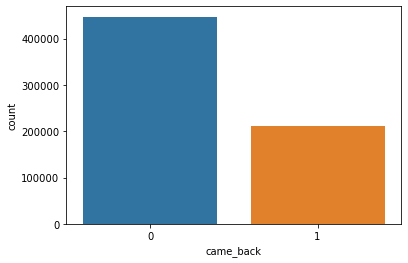

In [32]:
sns.countplot(data['came_back'])

So we have unbalanced data. To get more accurate results we need to do downsampling or upsampling.We will do only upsampling.

In [33]:
def plot_continuous(dataset, var_name):
    sns.distplot(dataset[var_name])
    plt.axvline(dataset[var_name].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(dataset[var_name].median(), color='r', linewidth=1)
    plt.title(f'Distribution of variable "{var_name}"')

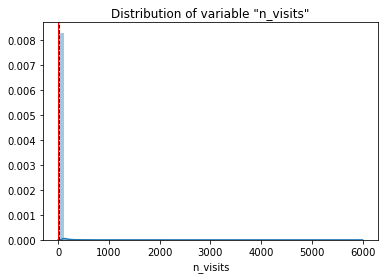

In [34]:
plot_continuous(data,'n_visits')

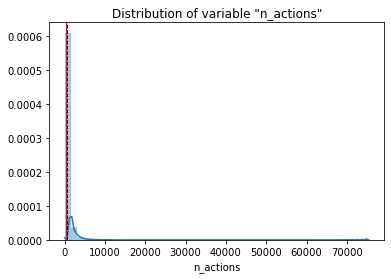

In [35]:
plot_continuous(data,'n_actions')

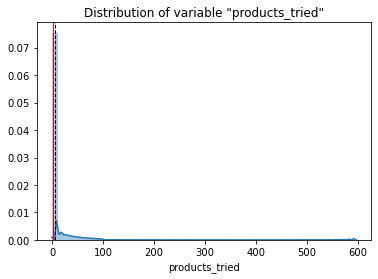

In [36]:
plot_continuous(data,'products_tried')

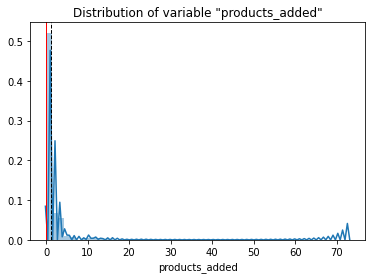

In [37]:
plot_continuous(data,'products_added')

After plotting, we can see that data concentrated at the beginning of the x-axis. So we can conclude that we have outliers. 

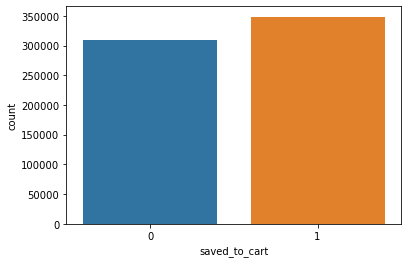

In [38]:
sns.countplot(data['saved_to_cart'])

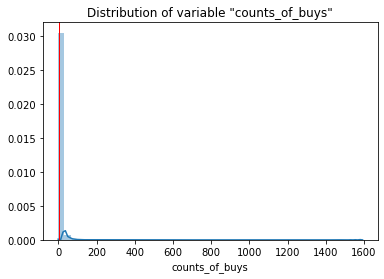

In [39]:
plot_continuous(data,'counts_of_buys')

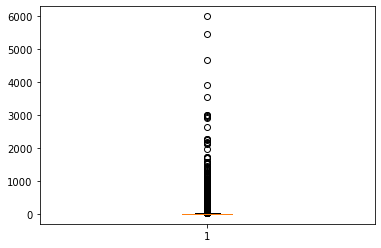

In [40]:
plt.boxplot(data["n_visits"])
plt.show()

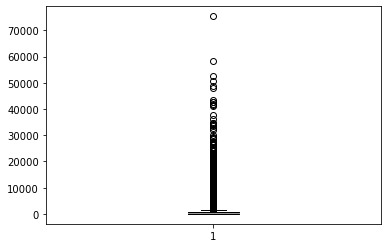

In [41]:
plt.boxplot(data["n_actions"])
plt.show()

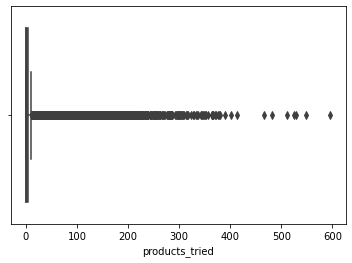

In [42]:
# Boxplot helps us to prove out hypothesis that we have outliers. 

sns.boxplot(x = 'products_tried',data = data)

In [43]:
# As we have so many outliers we will drop them by using the IQR method.

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

data1=remove_outlier_IQR(data)
data1.head()

,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
0,1.0,63.0,45.0,0.0,0.0,0.0,2.0,1,1.0,2.0,0
1,4.0,350.0,72.0,0.0,0.0,0.0,2.0,1,4.0,6.0,0
2,12.0,1019.0,123.0,5.0,2.0,6.0,6.0,1,NaN,14.0,0
3,1.0,503.0,124.0,0.0,0.0,NaN,16.0,0,0.0,0.0,0
4,15.0,NaN,139.0,0.0,0.0,NaN,13.0,1,NaN,NaN,1


In [44]:
data1 = data1.dropna()

In [45]:
data1.describe()

,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
count,436415.000000,436415.000000,436415.000000,436415.000000,436415.000000,436415.000000,436415.000000,436415.000000,436415.000000,436415.000000,436415.000000
mean,3.441426,216.546407,51.850001,1.232455,0.396705,2.738556,2.382833,0.387551,0.960822,1.614766,0.196444
std,3.256506,228.730176,25.799494,2.057980,0.667741,4.724117,2.935041,0.487192,1.593692,2.609534,0.397308
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,61.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,136.000000,50.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,290.000000,69.000000,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,2.000000,0.000000
max,18.000000,1350.000000,156.000000,10.000000,2.000000,25.000000,17.000000,1.000000,7.000000,15.000000,1.000000


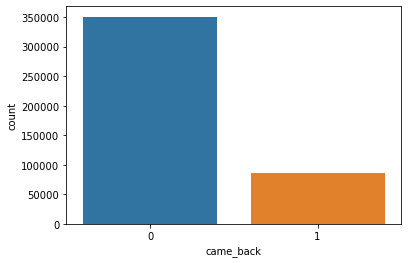

In [46]:
sns.countplot(data1['came_back'])

In [47]:
data1['came_back'].value_counts()

0    350684
1     85731
Name: came_back, dtype: int64

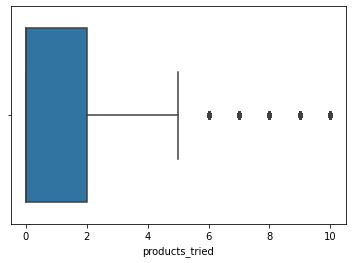

In [48]:
sns.boxplot(x = 'products_tried',data = data1)

#### Upsampling the data 

After dropping outliers we want to upsample, balance our data. But first of all we need to split our data into
test and train datasets. Why we do this? Because when we do upsampling we replace some observations and this can affect 
our result if we do the same in the test dataset. So we split our clean data , than on the train dataset we will do upsampling. 


In [50]:
target1 = data1['came_back'].astype(int)
X1 = data1.drop(columns='came_back')
X1 = pd.get_dummies(X1, columns=['saved_to_cart'])

train_x1,test_x1,train_y1,test_y1 = train_test_split(X1,target1,test_size=0.25,random_state=42)

print(f"Number of observations \n Train set: {len(train_x1)}\n Test set: {len(test_x1)}")

Number of observations 
 Train set: 327311
 Test set: 109104


In [51]:
train1 = pd.concat([train_x1, train_y1],  axis = 1)
majority = train1[train1.came_back==0]
minority = train1[train1.came_back==1]
majority.shape

(262894, 12)

In [52]:
upsample = resample(minority, 
                       replace=True,    
                       n_samples=262894,     
                       random_state=42) 
 

upsample = pd.concat([majority,upsample])
 
upsample['came_back'].value_counts()

1    262894
0    262894
Name: came_back, dtype: int64

In [108]:
train_y_up = upsample['came_back'].astype(int)
train_x_up = upsample.drop(columns='came_back',axis = 1)

print(f"Number of observations \n Train set: {len(train_x_up)}\n Test set: {len(test_x1)}")

Number of observations 
 Train set: 525788
 Test set: 109104


In [109]:
X_train_stand_up = train_x_up.copy()
X_test_stand_up = test_x1.copy()

# numerical features
num_cols = ['n_visits','n_actions','unique_actions','products_tried','products_added','unique_products_category_tried',
           'unique_products_category_added','comments_writen','counts_of_buys']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand_up[[i]])
    
    # transform the training data column
    X_train_stand_up[i] = scale.transform(X_train_stand_up[[i]])
    
    # transform the testing data column
    X_test_stand_up[i] = scale.transform(X_test_stand_up[[i]])

### KNN for cleaned and upsampled data 

In [110]:
#After upsampling we try KNN for 9 neighbors. 

from sklearn import neighbors
KNN_model_up=neighbors.KNeighborsClassifier(n_neighbors=9 ,n_jobs=-1)

KNN_model_up.fit(X_train_stand_up,train_y_up)

KNeighborsClassifier(n_jobs=-1, n_neighbors=9)

In [111]:
#Unfortunetly we get so low accuracy score. 

pred_up=KNN_model_up.predict(X_test_stand_up)

acc_test_up = accuracy_score(test_y1,pred_up)
acc_test_up

0.7126778119958939

In [113]:
#Here also we try to find optimal K. 

from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,30):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train_stand_up,train_y_up)
    pred=clf.predict(X_test_stand_up)
    f=f1_score(test_y1,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

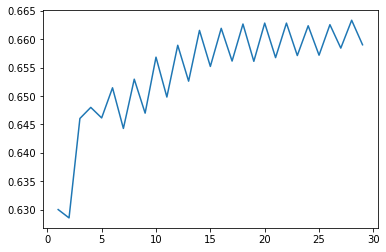

In [114]:
plt.plot(k_list,f1_list)

In [116]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(18,23):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train_stand_up,train_y_up)
    pred=clf.predict(X_test_stand_up)
    f=f1_score(test_y1,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

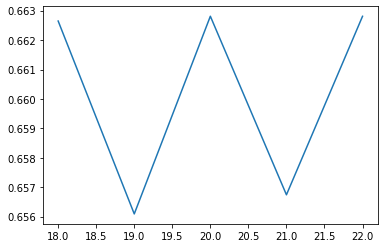

In [117]:
plt.plot(k_list,f1_list)

In [118]:
KNN_model_up=neighbors.KNeighborsClassifier(n_neighbors=20 ,n_jobs=-1)

KNN_model_up.fit(X_train_stand_up,train_y_up)

KNeighborsClassifier(n_jobs=-1, n_neighbors=20)

In [119]:
#Even though we find the best K for KNN our accuracy is still low. So we need to try another method for this dataset. 

pred_up=KNN_model_up.predict(X_test_stand_up)

acc_test_up = accuracy_score(test_y1,pred_up)
acc_test_up

0.725903724886347

In [122]:
from sklearn.metrics import classification_report

print(classification_report(test_y1, pred_up))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81     87790
           1       0.39      0.75      0.52     21314

    accuracy                           0.73    109104
   macro avg       0.66      0.74      0.66    109104
weighted avg       0.82      0.73      0.75    109104



### Decision tree for clean and upsampled data 

In [128]:
# At this time we try Decisition Tree classifier on the clean and upsampled data without any hyperparametr. 

model = DecisionTreeClassifier()
model.fit(X_train_stand_up,train_y_up)
pred_dc = model.predict(X_test_stand_up)
acc_dc = accuracy_score(test_y1,pred_dc)

In [129]:
#As we can see we get higher result than on the rsw data. 

acc_dc

0.7601646135797038

In [186]:
print(classification_report(test_y1, pred_dc))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     87790
           1       0.39      0.40      0.39     21314

    accuracy                           0.76    109104
   macro avg       0.62      0.62      0.62    109104
weighted avg       0.76      0.76      0.76    109104



In [169]:
#So lets fin the optimal tree. 

from sklearn.model_selection import GridSearchCV

tree_params2 = {"criterion": ["gini", "entropy"], "max_depth": list(range(28,45,1)), 
              "min_samples_leaf": list(range(2,12,1))}
grid_tree2 = GridSearchCV(DecisionTreeClassifier(), tree_params2)
grid_tree2.fit(X_train_stand_up, train_y_up)

print('Best Criterion:', grid_tree2.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_tree2.best_estimator_.get_params()['max_depth'])
print('min_samples_leaf:', grid_tree2.best_estimator_.get_params()['min_samples_leaf'])


Best Criterion: entropy
Best max_depth: 41
min_samples_leaf: 2


In [252]:
model2 = DecisionTreeClassifier(criterion="entropy",max_depth=75,min_samples_leaf=2)
model2.fit(X_train_stand_up,train_y_up)
pred_dc2 = model2.predict(X_test_stand_up)
acc_dc_op2 = accuracy_score(test_y1,pred_dc2)
acc_dc_op2

0.7549952339052647

In [251]:
print(classification_report(test_y1, pred_dc2))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     87790
           1       0.39      0.44      0.41     21314

    accuracy                           0.75    109104
   macro avg       0.62      0.63      0.63    109104
weighted avg       0.77      0.75      0.76    109104



### Conclusion

So we have 4 models: first two models KNN and Decision tree on raw data.

On raw data.

KNN_model=neighbors.KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

model1 = DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=8)

Here we get higher accuracy by decision tree:model1.

On clean and upsampled data. 

KNN_model_up=neighbors.KNeighborsClassifier(n_neighbors=20 ,n_jobs=-1)

model = DecisionTreeClassifier()

Here we get higher accuracy also on Decision Tree. But it is lower than on the raw data's model. 